# Capstone Project - Berlin Restaurants Analysis

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

In this project we will try to find an optimal location for an Italian restaurant in **Berlin**, Germany.

Berlin is the capital and the largest city in Germany with lots of touristic and historic sights. This international city is popular with museums, galleries, nightlife, festivals, performing arts and cuisine. We will focus on the **center areas where the young population and the tourists mostly hang out** and enjoy the city. Therefore, we will eliminate some boroughs/neighborhoods at the beginning of our analysis.
We are also particularly interested in **the areas with lower crime rates**. We need to mention that Berlin is pretty safe, there are not any drug wars, murderers, dark ghettos or anything like that. 

By using data science powers we will try to find the most promising neighborhoods that fulfill our requirements.

## Data <a name="data"></a>

Based on definition of our problem, factors that will influence our decision are:
* number of existing Italian restaurants in the neighborhood (any type of restaurant)
* popularity of neighborhood
* crime rates in the neighborhood

Following data sources will be needed:
* name of boroughs and neighborhoods will be obtained from wikipedia and their coordinates will be generated by using **Google Maps API geocoding**
* number of restaurants and their type and location in every neighborhood will be obtained using **Foursquare API**
* crime statistics will be obtained from **Kaggle**

### Neighborhood Candidates


First, we need to import our external libraries to be able work with the datas.

In [1]:
import requests 
import pandas as pd 
import numpy as np 
import random 
import folium 
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from geopy.geocoders import Nominatim 


from IPython.display import Image 
from IPython.core.display import HTML 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)    

from pandas.io.json import json_normalize

print('Libraries imported.')

Libraries imported.


By using beautiful soup we will scrap the wikipedia webpage to gather the boroughs and neighborhoods of Berlin

In [2]:
URL="https://en.wikipedia.org/wiki/Boroughs_and_neighborhoods_of_Berlin"

In [3]:
response = requests.get(URL)

web_page = response.text

soup= BeautifulSoup(web_page, "html.parser")

we create a function that will be used to loop on the neighborhoods to find their coordinates 

In [4]:
 def long_lat(address):   
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(f"{address},Berlin")
    latitude = location.latitude
    longitude = location.longitude
    return (latitude, longitude)

In [5]:
boroughs=[]
neighborhoods=[]
latitude=[]
longitude=[]
data = {"Boroughs":boroughs,"Neighborhoods":neighborhoods,"Latitude":latitude,"Longitude":longitude}
table_1= soup.findAll('table')
all_tr= table_1[-3].findAll("tr")

In [6]:
for row in all_tr[1:-1]:
    x=row.text.replace("\n",",").split(",")[:-1]
    for i in x[1:]:
        boroughs.append(x[0].strip(" ").split(" ")[0])
        neighborhoods.append(i)
        data["Latitude"].append(long_lat(i)[0])
        data["Longitude"].append(long_lat(i)[1])  

We create our dataframe which consists of boroughs, neighborhoods and their coordinates

In [7]:
df=pd.DataFrame(data)
df.head()

,Boroughs,Neighborhoods,Latitude,Longitude
0,Charlottenburg-Wilmersdorf,Charlottenburg,52.515747,13.309683
1,Charlottenburg-Wilmersdorf,Charlottenburg-Nord,52.540525,13.296266
2,Charlottenburg-Wilmersdorf,Grunewald,52.487347,13.263754
3,Charlottenburg-Wilmersdorf,Halensee,52.497226,13.292999
4,Charlottenburg-Wilmersdorf,Schmargendorf,52.478902,13.292996


As we mentioned in the introduction part, we will eliminate some boroughs that we are not interested in, since they are either too far away from city center or they do not have any touristic sights. 

In [8]:
df.set_index("Boroughs", inplace=True)
df.drop(['Lichtenberg',
 'Marzahn-Hellersdorf',
 'Reinickendorf',
 'Spandau',
 'Steglitz-Zehlendorf',
 'Tempelhof-Schöneberg',
 'Treptow-Köpenick'],inplace=True)
df.reset_index(inplace=True)
df

,Boroughs,Neighborhoods,Latitude,Longitude
0,Charlottenburg-Wilmersdorf,Charlottenburg,52.515747,13.309683
1,Charlottenburg-Wilmersdorf,Charlottenburg-Nord,52.540525,13.296266
2,Charlottenburg-Wilmersdorf,Grunewald,52.487347,13.263754
3,Charlottenburg-Wilmersdorf,Halensee,52.497226,13.292999
4,Charlottenburg-Wilmersdorf,Schmargendorf,52.478902,13.292996
5,Charlottenburg-Wilmersdorf,Westend,52.513399,13.255842
6,Charlottenburg-Wilmersdorf,Wilmersdorf,52.487115,13.320330
7,Friedrichshain-Kreuzberg,Friedrichshain,52.512215,13.450290
8,Friedrichshain-Kreuzberg,Kreuzberg,52.497644,13.411914
9,Mitte,Gesundbrunnen,52.550920,13.384846


In [9]:
neigh_not_interested=["Rudow","Buckow","Gropiusstadt","Britz","Buch","Karow","Blankenfelde","Französisch Buchholz","Blankenburg","Rosenthal","Grunewald"]

In [10]:
df.set_index("Neighborhoods",inplace=True)
df.drop(neigh_not_interested,inplace=True)
df.reset_index(inplace=True)
df.set_index("Boroughs",inplace=True)
df.reset_index(inplace=True)


and we have our final data frame:

In [11]:
df

,Boroughs,Neighborhoods,Latitude,Longitude
0,Charlottenburg-Wilmersdorf,Charlottenburg,52.515747,13.309683
1,Charlottenburg-Wilmersdorf,Charlottenburg-Nord,52.540525,13.296266
2,Charlottenburg-Wilmersdorf,Halensee,52.497226,13.292999
3,Charlottenburg-Wilmersdorf,Schmargendorf,52.478902,13.292996
4,Charlottenburg-Wilmersdorf,Westend,52.513399,13.255842
5,Charlottenburg-Wilmersdorf,Wilmersdorf,52.487115,13.320330
6,Friedrichshain-Kreuzberg,Friedrichshain,52.512215,13.450290
7,Friedrichshain-Kreuzberg,Kreuzberg,52.497644,13.411914
8,Mitte,Gesundbrunnen,52.550920,13.384846
9,Mitte,Hansaviertel,52.519123,13.341872


Let's check our neighborhoods on the folium map

In [12]:
address = 'Berlin'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(f"the coordinates of Berlin: {latitude}(lat), {longitude}(lon)")

the coordinates of Berlin: 52.5170365(lat), 13.3888599(lon)


In [13]:
map_berlin = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['Boroughs'], df['Neighborhoods']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_berlin)  
    
map_berlin

### Foursquare

Now that we have our favourite neighorhoods, let's find out which restaurants are already existing in each neighborhood.

In [14]:
CLIENT_ID = ' ' # your Foursquare ID
CLIENT_SECRET = ' ' # your Foursquare Secret
ACCESS_TOKEN = ' ' # your FourSquare Access Token
VERSION = '20210506'
LIMIT = 50
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CLIENT_SECRET: 

In [15]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, section="food"):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&section={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION,
            section,
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


In [16]:
berlin_venues = getNearbyVenues(names=df['Neighborhoods'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

In [17]:
print(f"There are already {berlin_venues.shape[0]} existing venues in our neighborhoods")
berlin_venues.head()

There are already 402 existing venues in our neighborhoods


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Charlottenburg,52.515747,13.309683,Trattoria Rathaus Piazza,52.516778,13.308748,Trattoria/Osteria
1,Charlottenburg,52.515747,13.309683,Zur Mieze - Katzenmusikcafé,52.515899,13.304765,Pet Café
2,Charlottenburg,52.515747,13.309683,Sole d`Oro CUCINA ITALIANA,52.514660,13.305146,Pizza Place
3,Charlottenburg,52.515747,13.309683,"Falafel, Schawarma & Halloumi",52.512515,13.305099,Falafel Restaurant
4,Charlottenburg,52.515747,13.309683,Genki Sushi,52.514541,13.304827,Sushi Restaurant


## Methodology <a name="methodology"></a>

As a first step we collected the necessary datas for our analysis:
* **The most touristic and crowded neighborhoods and their coordinates**
* **The all restaurants that are located in these neighborhoods** (Foursquare)

In the next step we will explore the neighborhoods by checking the **restaurant density** in these areas.<br>
In third step we will be clustering the neighborhoods according to the density and type of restaurants by using an unsupervised learning method(**K-Means clustering**).<br>
In fourth and final step we will review **crime statistics of Berlin** and by taking these statistics into the consideration we will try to find the most promising neighborhood candidates for our restaurant.  


## Analysis <a name="analysis"></a>

### Restaurants Analysis

Since we need only the restaurants and the venue categories with more specific names, we drop these ones:

In [18]:
venues_to_drop=["Bakery","Café","Restaurant","Irish Pub","Bistro","Diner"]
for venue in venues_to_drop:
    cafe_indexes=list(berlin_venues[berlin_venues["Venue Category"]==venue].index)
    berlin_venues.drop(cafe_indexes,inplace=True)

Since Doner restaurant is basically a Turkish restaurant, we can replace it with Turkish restaurant

In [19]:
berlin_venues['Venue Category'] = berlin_venues['Venue Category'].replace(['Doner Restaurant'],'Turkish Restaurant')

The number of venues in each neighborhood:

In [20]:
berlin_venues.groupby('Neighborhood').count()["Venue"]

Neighborhood
Charlottenburg         21
Charlottenburg-Nord     1
Friedrichshain         22
Gesundbrunnen          24
Halensee               16
Hansaviertel            4
Heinersdorf             3
Kreuzberg              27
Mitte                  32
Moabit                 31
Neukölln               36
Niederschönhausen       3
Pankow                  2
Prenzlauer Berg        15
Schmargendorf           9
Tiergarten              3
Wedding                 2
Weißensee               5
Westend                 3
Wilhelmsruh             2
Wilmersdorf            23
Name: Venue, dtype: int64

In [21]:
print('There are {} unique categories.'.format(len(berlin_venues['Venue Category'].unique())))

There are 63 unique categories.


we expand our dataframe according to the venue categories for each neighborhood to have a better overview and to facilitate to use it for the next steps

In [22]:
# one hot encoding
berlin_onehot = pd.get_dummies(berlin_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
berlin_onehot['Neighborhood'] = berlin_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [berlin_onehot.columns[-1]] + list(berlin_onehot.columns[:-1])
berlin_onehot = berlin_onehot[fixed_columns]

berlin_onehot.head()

,Neighborhood,African Restaurant,Asian Restaurant,Austrian Restaurant,BBQ Joint,Bagel Shop,Bavarian Restaurant,Breakfast Spot,Burger Joint,Burrito Place,Cafeteria,Chinese Restaurant,Cigkofte Place,Creperie,Currywurst Joint,Deli / Bodega,Donut Shop,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Fish & Chips Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,German Restaurant,Greek Restaurant,Halal Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Kebab Restaurant,Korean Restaurant,Kurdish Restaurant,Lebanese Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Pakistani Restaurant,Peruvian Restaurant,Pet Café,Pide Place,Pizza Place,Polish Restaurant,Salad Place,Sandwich Place,Scandinavian Restaurant,Seafood Restaurant,Snack Place,Soup Place,Spanish Restaurant,Steakhouse,Sushi Restaurant,Syrian Restaurant,Tapas Restaurant,Taverna,Thai Restaurant,Trattoria/Osteria,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Charlottenburg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,Charlottenburg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Charlottenburg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Charlottenburg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Charlottenburg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [23]:
berlin_onehot.shape

(284, 64)

Now we group the neighborhoods and take the mean value for each venue category

In [24]:
berlin_grouped = berlin_onehot.groupby('Neighborhood').mean().reset_index()
berlin_grouped

,Neighborhood,African Restaurant,Asian Restaurant,Austrian Restaurant,BBQ Joint,Bagel Shop,Bavarian Restaurant,Breakfast Spot,Burger Joint,Burrito Place,Cafeteria,Chinese Restaurant,Cigkofte Place,Creperie,Currywurst Joint,Deli / Bodega,Donut Shop,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Fish & Chips Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,German Restaurant,Greek Restaurant,Halal Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Kebab Restaurant,Korean Restaurant,Kurdish Restaurant,Lebanese Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Pakistani Restaurant,Peruvian Restaurant,Pet Café,Pide Place,Pizza Place,Polish Restaurant,Salad Place,Sandwich Place,Scandinavian Restaurant,Seafood Restaurant,Snack Place,Soup Place,Spanish Restaurant,Steakhouse,Sushi Restaurant,Syrian Restaurant,Tapas Restaurant,Taverna,Thai Restaurant,Trattoria/Osteria,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Charlottenburg,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,0.142857,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.047619,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.095238,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.047619,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.047619,0.000000,0.000000,0.047619,0.000000,0.047619,0.047619,0.000000,0.047619
1,Charlottenburg-Nord,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
2,Friedrichshain,0.045455,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.045455,0.000000,0.000000,0.000000,0.045455,0.000000,0.000000,0.045455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455,0.000000,0.045455,0.000000,0.000000,0.045455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.136364,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.045455,0.000000,0.000000,0.000000,0.000000,0.045455,0.045455,0.090909,0.181818,0.000000
3,Gesundbrunnen,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.041667,0.000000,0.000000,0.041667,0.000000,0.041667,0.000000,0.000000,0.041667,0.041667,0.000000,0.000000,0.000000,0.000000,0.041667,0.000000,0.000000,0.000000,0.041667,0.000000,0.125000,0.000000,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,0.041667,0.000000,0.041667,0.000000,0.000000,0.041667,0.041667,0.000000,0.000000,0.041667,0.000000,0.041667,0.000000,0.0000,0.000000,0.000000,0.000000,0.041667,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000
4,Halensee,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.062500,0.000000,0.000000,0.187500,0.062500,0.000000,0.062500,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0625,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.187500,0.000000,0.000000
5,Hansav

Now we can visualize the five top venue category frequencies for each neighborhood

In [25]:
num_top_venues = 5

for hood in berlin_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = berlin_grouped[berlin_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Charlottenburg----
                   venue  freq
0            Pizza Place  0.14
1     Chinese Restaurant  0.14
2     Italian Restaurant  0.10
3  Vietnamese Restaurant  0.05
4   Fast Food Restaurant  0.05


----Charlottenburg-Nord----
                 venue  freq
0   Turkish Restaurant   1.0
1   African Restaurant   0.0
2       Sandwich Place   0.0
3   Kurdish Restaurant   0.0
4  Lebanese Restaurant   0.0


----Friedrichshain----
                           venue  freq
0  Vegetarian / Vegan Restaurant  0.18
1      Middle Eastern Restaurant  0.14
2             Turkish Restaurant  0.09
3                     Bagel Shop  0.09
4             African Restaurant  0.05


----Gesundbrunnen----
                  venue  freq
0    Turkish Restaurant  0.25
1    Italian Restaurant  0.12
2    Falafel Restaurant  0.04
3      Currywurst Joint  0.04
4  Fast Food Restaurant  0.04


----Halensee----
                      venue  freq
0        Turkish Restaurant  0.19
1        Italian Restaurant  0.19
2  

In [26]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Let's create a new dataframe and display the top 10 venues for each neighborhood

In [27]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = berlin_grouped['Neighborhood']

for ind in np.arange(berlin_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(berlin_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Charlottenburg,Pizza Place,Chinese Restaurant,Italian Restaurant,Vietnamese Restaurant,Burger Joint,Pet Café,Currywurst Joint,German Restaurant,Falafel Restaurant,Fast Food Restaurant
1,Charlottenburg-Nord,Turkish Restaurant,Vietnamese Restaurant,Donut Shop,Halal Restaurant,Greek Restaurant,German Restaurant,Gastropub,Fried Chicken Joint,French Restaurant,Food Truck
2,Friedrichshain,Vegetarian / Vegan Restaurant,Middle Eastern Restaurant,Turkish Restaurant,Bagel Shop,African Restaurant,Burrito Place,Gastropub,Italian Restaurant,Donut Shop,Creperie
3,Gesundbrunnen,Turkish Restaurant,Italian Restaurant,Pizza Place,Chinese Restaurant,Halal Restaurant,Kebab Restaurant,Fast Food Restaurant,Falafel Restaurant,Middle Eastern Restaurant,Donut Shop
4,Halensee,Turkish Restaurant,Italian Restaurant,Japanese Restaurant,Spanish Restaurant,Korean Restaurant,Mediterranean Restaurant,Eastern European Restaurant,Greek Restaurant,Soup Place,German Restaurant


We will use K-Means clustering method, which is a unsupervised machine learning method, to cluster our neighborhoods.
We want it to divide the neighborhoods into 3 clusters

In [28]:
from sklearn.cluster import KMeans
kclusters = 3

berlin_grouped_clustering = berlin_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(berlin_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 0, 1, 1, 1, 1, 1, 1, 2, 1])

Now we have our clusters and we can add them to our main dataframe

In [29]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

berlin_merged = df

berlin_merged = berlin_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhoods')

berlin_merged.dropna(inplace=True)
berlin_merged["Cluster Labels"]

0     1.0
1     0.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    2.0
11    1.0
12    2.0
13    0.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
20    2.0
21    1.0
Name: Cluster Labels, dtype: float64

In [30]:
berlin_merged

,Boroughs,Neighborhoods,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Charlottenburg-Wilmersdorf,Charlottenburg,52.515747,13.309683,1.0,Pizza Place,Chinese Restaurant,Italian Restaurant,Vietnamese Restaurant,Burger Joint,Pet Café,Currywurst Joint,German Restaurant,Falafel Restaurant,Fast Food Restaurant
1,Charlottenburg-Wilmersdorf,Charlottenburg-Nord,52.540525,13.296266,0.0,Turkish Restaurant,Vietnamese Restaurant,Donut Shop,Halal Restaurant,Greek Restaurant,German Restaurant,Gastropub,Fried Chicken Joint,French Restaurant,Food Truck
2,Charlottenburg-Wilmersdorf,Halensee,52.497226,13.292999,1.0,Turkish Restaurant,Italian Restaurant,Japanese Restaurant,Spanish Restaurant,Korean Restaurant,Mediterranean Restaurant,Eastern European Restaurant,Greek Restaurant,Soup Place,German Restaurant
3,Charlottenburg-Wilmersdorf,Schmargendorf,52.478902,13.292996,1.0,Italian Restaurant,Deli / Bodega,Trattoria/Osteria,BBQ Joint,Chinese Restaurant,Snack Place,Food Court,Falafel Restaurant,Fast Food Restaurant,Fish & Chips Shop
4,Charlottenburg-Wilmersdorf,Westend,52.513399,13.255842,1.0,Food Truck,Fast Food Restaurant,Italian Restaurant,Vietnamese Restaurant,Donut Shop,Halal Restaurant,Greek Restaurant,German Restaurant,Gastropub,Fried Chicken Joint
5,Charlottenburg-Wilmersdorf,Wilmersdorf,52.487115,13.320330,1.0,Italian Restaurant,Vietnamese Restaurant,Turkish Restaurant,Burger Joint,Pizza Place,Asian Restaurant,Bavarian Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant
6,Friedrichshain-Kreuzberg,Friedrichshain,52.512215,13.450290,1.0,Vegetarian / Vegan Restaurant,Middle Eastern Restaurant,Turkish Restaurant,Bagel Shop,African Restaurant,Burrito Place,Gastropub,Italian Restaurant,Donut Shop,Creperie
7,Friedrichshain-Kreuzberg,Kreuzberg,52.497644,13.411914,1.0,Turkish Restaurant,Italian Restaurant,Korean Restaurant,German Restaurant,African Restaurant,Seafood Restaurant,Gastropub,Kebab Restaurant,Kurdish Restaurant,Middle Eastern Restaurant
8,Mitte,Gesundbrunnen,52.550920,13.384846,1.0,Turkish Restaurant,Italian Restaurant,Pizza Place,Chinese Restaurant,Halal Restaurant,Kebab Restaurant,Fast Food Restaurant,Falafel Restaurant,Middle Eastern Restaurant,Donut Shop
9,Mitte,Hansaviertel,52.519123,13.341872,1.0,Mediterranean Restaurant,Turkish Restaurant,Currywurst Joint,Kebab Restaurant,Food Truck,Falafel Restaurant,Fast Food Restaurant,Fish & Chips Shop,Food Court,Vietnamese Restaurant


For next step we will try to find out what is the most common venue in each cluster

In [31]:
count_venue = berlin_merged
count_venue = count_venue.drop(['Boroughs','Neighborhoods', 'Latitude', 'Longitude'], axis=1)
count_venue = count_venue.groupby(['Cluster Labels','1st Most Common Venue']).size().reset_index(name='Counts')
count_venue

#we can transpose it to plot bar chart
cv_cluster = count_venue.pivot(index='Cluster Labels', columns='1st Most Common Venue', values='Counts')
cv_cluster = cv_cluster.fillna(0).astype(int).reset_index(drop=True)
cv_cluster

1st Most Common Venue,Asian Restaurant,Food Truck,Fried Chicken Joint,German Restaurant,Italian Restaurant,Mediterranean Restaurant,Pizza Place,Scandinavian Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,0,0,0,0,0,0,0,0,2,0,0
1,1,1,1,0,4,1,1,0,5,1,1
2,0,0,0,2,0,0,0,1,0,0,0


We create a bar chart to visualize the most common venues in each cluster

Text(0, 0.5, 'Number of Venues')

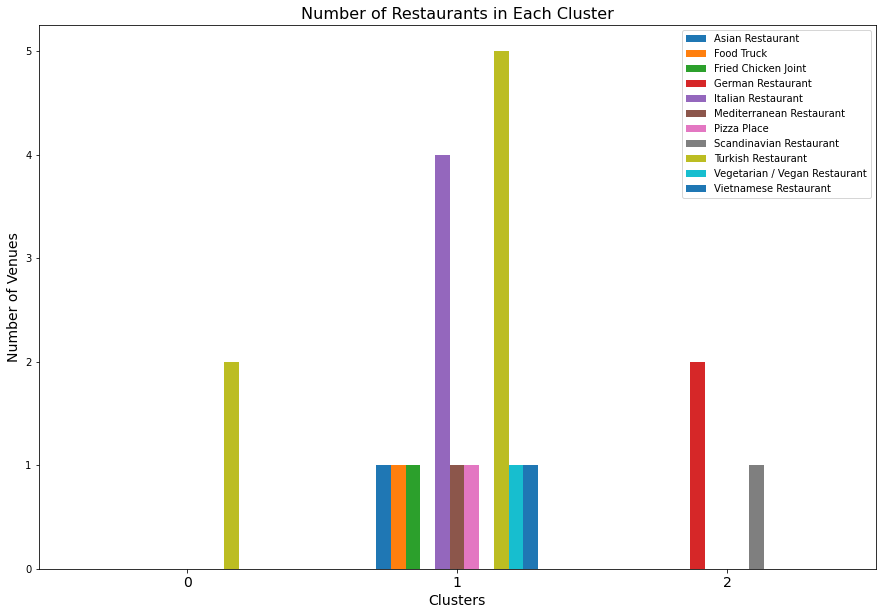

In [32]:
#creating a bar chart of "Number of Venues in Each Cluster"
frame=cv_cluster.plot(kind='bar',figsize=(15,10),width = 0.6)

plt.legend(labels=cv_cluster.columns,fontsize= 10)
plt.title("Number of Restaurants in Each Cluster",fontsize= 16)
plt.xticks(fontsize=14)
plt.xticks(rotation=0)
plt.xlabel('Clusters', fontsize=14)
plt.ylabel('Number of Venues', fontsize=14)


   As we can see from the chart:

+  **Cluster 0** : Turkish restaurant areas  <br><br>
+  **Cluster 1** : Turkish/Italian restaurant areas <br><br>
+  **Cluster 2** : German restaurant areas 

Let's visualize our clusters on our map

In [33]:
import matplotlib.cm as cm
import matplotlib.colors as colors
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(berlin_merged['Latitude'], berlin_merged['Longitude'], berlin_merged['Neighborhoods'], berlin_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Cluster 0 (Turkish) neighborhoods:

In [34]:
berlin_merged.loc[berlin_merged['Cluster Labels'] == 0, berlin_merged.columns[[0] + [1] + list(range(4, berlin_merged.shape[1]))]]

,Boroughs,Neighborhoods,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Charlottenburg-Wilmersdorf,Charlottenburg-Nord,0.0,Turkish Restaurant,Vietnamese Restaurant,Donut Shop,Halal Restaurant,Greek Restaurant,German Restaurant,Gastropub,Fried Chicken Joint,French Restaurant,Food Truck
13,Mitte,Wedding,0.0,Turkish Restaurant,Vietnamese Restaurant,Donut Shop,Halal Restaurant,Greek Restaurant,German Restaurant,Gastropub,Fried Chicken Joint,French Restaurant,Food Truck


Cluster 1 (Turkish/Italian) neighborhoods:

In [35]:
berlin_merged.loc[berlin_merged['Cluster Labels'] == 1, berlin_merged.columns[[0] +[1] + list(range(4, berlin_merged.shape[1]))]]

,Boroughs,Neighborhoods,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Charlottenburg-Wilmersdorf,Charlottenburg,1.0,Pizza Place,Chinese Restaurant,Italian Restaurant,Vietnamese Restaurant,Burger Joint,Pet Café,Currywurst Joint,German Restaurant,Falafel Restaurant,Fast Food Restaurant
2,Charlottenburg-Wilmersdorf,Halensee,1.0,Turkish Restaurant,Italian Restaurant,Japanese Restaurant,Spanish Restaurant,Korean Restaurant,Mediterranean Restaurant,Eastern European Restaurant,Greek Restaurant,Soup Place,German Restaurant
3,Charlottenburg-Wilmersdorf,Schmargendorf,1.0,Italian Restaurant,Deli / Bodega,Trattoria/Osteria,BBQ Joint,Chinese Restaurant,Snack Place,Food Court,Falafel Restaurant,Fast Food Restaurant,Fish & Chips Shop
4,Charlottenburg-Wilmersdorf,Westend,1.0,Food Truck,Fast Food Restaurant,Italian Restaurant,Vietnamese Restaurant,Donut Shop,Halal Restaurant,Greek Restaurant,German Restaurant,Gastropub,Fried Chicken Joint
5,Charlottenburg-Wilmersdorf,Wilmersdorf,1.0,Italian Restaurant,Vietnamese Restaurant,Turkish Restaurant,Burger Joint,Pizza Place,Asian Restaurant,Bavarian Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant
6,Friedrichshain-Kreuzberg,Friedrichshain,1.0,Vegetarian / Vegan Restaurant,Middle Eastern Restaurant,Turkish Restaurant,Bagel Shop,African Restaurant,Burrito Place,Gastropub,Italian Restaurant,Donut Shop,Creperie
7,Friedrichshain-Kreuzberg,Kreuzberg,1.0,Turkish Restaurant,Italian Restaurant,Korean Restaurant,German Restaurant,African Restaurant,Seafood Restaurant,Gastropub,Kebab Restaurant,Kurdish Restaurant,Middle Eastern Restaurant
8,Mitte,Gesundbrunnen,1.0,Turkish Restaurant,Italian Restaurant,Pizza Place,Chinese Restaurant,Halal Restaurant,Kebab Restaurant,Fast Food Restaurant,Falafel Restaurant,Middle Eastern Restaurant,Donut Shop
9,Mitte,Hansaviertel,1.0,Mediterranean Restaurant,Turkish Restaurant,Currywurst Joint,Kebab Restaurant,Food Truck,Falafel Restaurant,Fast Food Restaurant,Fish & Chips Shop,Food Court,Vietnamese Restaurant
11,Mitte,Moabit,1.0,Turkish Restaurant,Burger Joint,German Restaurant,Breakfast Spot,Vegetarian / Vegan Restaurant,Italian Restaurant,Peruvian Restaurant,Mediterranean Restaurant,Fast Food Restaurant,Salad Place


Cluster 2 (German) neighborhoods:

In [36]:
berlin_merged.loc[berlin_merged['Cluster Labels'] == 2, berlin_merged.columns[[0] +[1] + list(range(4, berlin_merged.shape[1]))]]

,Boroughs,Neighborhoods,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Mitte,Mitte,2.0,German Restaurant,Vietnamese Restaurant,Pizza Place,Italian Restaurant,Japanese Restaurant,Breakfast Spot,French Restaurant,Fast Food Restaurant,Salad Place,Bagel Shop
12,Mitte,Tiergarten,2.0,Scandinavian Restaurant,German Restaurant,Breakfast Spot,Vietnamese Restaurant,Food Court,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Fish & Chips Shop,French Restaurant
20,Pankow,Weißensee,2.0,German Restaurant,Vietnamese Restaurant,Fast Food Restaurant,Donut Shop,Halal Restaurant,Greek Restaurant,Gastropub,Fried Chicken Joint,French Restaurant,Food Truck


### Crime Statistics Analysis

First, we need to import the crime statistics of Berlin(**crimes occured between 2012-2019-kaggle**)

In [37]:
df_cr=pd.read_csv("Berlin_crimes.csv")

In [38]:
df_cr.head()

,Year,District,Code,Location,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local
0,2012,Mitte,10111,Tiergarten Süd,70,46,586,194,118,2263,18,328,120,68,16,4,273,26,171,1032
1,2012,Mitte,10112,Regierungsviertel,65,29,474,123,142,3203,10,307,170,37,10,4,380,124,98,870
2,2012,Mitte,10113,Alexanderplatz,242,136,1541,454,304,8988,81,792,822,275,49,27,1538,522,435,3108
3,2012,Mitte,10114,Brunnenstraße Süd,52,25,254,60,66,1916,86,192,396,131,14,5,428,122,213,752
4,2012,Mitte,10221,Moabit West,130,51,629,185,199,2470,94,410,325,161,42,22,516,64,259,1403


We drop the columns that we do not need

In [39]:
df_cr.drop(["Code","Location","Year"],axis=1, inplace=True)

We will add an extra column as "Total Crimes" to see the total number of crimes 

In [40]:
df_cr["Total Crimes"] = df_cr[df_cr.columns[1:]].sum(axis=1)
df_cr.rename(columns = {'District':'Borough'}, inplace = True)

In [41]:
df_cr.head()

,Borough,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local,Total Crimes
0,Mitte,70,46,586,194,118,2263,18,328,120,68,16,4,273,26,171,1032,5333
1,Mitte,65,29,474,123,142,3203,10,307,170,37,10,4,380,124,98,870,6046
2,Mitte,242,136,1541,454,304,8988,81,792,822,275,49,27,1538,522,435,3108,19314
3,Mitte,52,25,254,60,66,1916,86,192,396,131,14,5,428,122,213,752,4712
4,Mitte,130,51,629,185,199,2470,94,410,325,161,42,22,516,64,259,1403,6960


We will group by neighborhoods to be able to see how many crimes occured in each neighborhood

In [42]:
df_new=df_cr.groupby("Borough").sum()
df_new.reset_index(inplace=True)
df_new

,Borough,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local,Total Crimes
0,Charlottenburg-Wilmersdorf,4220,2039,31931,7797,11380,210033,5821,32476,26447,10606,1313,593,29329,6364,8425,80844,469618
1,Friedrichshain-Kreuzberg,6748,4310,37719,12220,9244,213388,3667,22486,32462,6605,2072,741,40089,10108,31683,88644,522186
2,Lichtenberg,1890,1057,21001,4525,6431,99402,5251,17003,13868,4445,1439,572,22543,5046,3530,48782,256785
3,Marzahn-Hellersdorf,1981,1090,24198,4576,7330,76041,4500,13861,8295,3735,1651,532,22738,4714,3086,48691,227019
4,Mitte,7582,4225,59628,15730,17130,328450,4186,34665,33574,9915,2372,900,45457,10982,26445,126407,727648
5,Neukölln,4659,2545,32239,9261,11477,161622,4083,25428,15568,8861,1903,854,32975,5321,12253,82737,411786
6,Pankow,2581,1304,23057,5409,8165,167927,5732,22013,34665,7911,1654,661,33486,9701,4832,69960,399058
7,Reinickendorf,2385,1171,22514,5333,9137,99013,2754,18202,9876,6784,1354,516,20899,4022,7300,52325,263585
8,Spandau,2314,1193,22670,5318,8378,89812,2590,13146,8555,4396,1348,544,20004,2796,4163,52355,239582
9,Steglitz-Zehlendorf,1624,794,13871,2720,6476,101487,3901,19679,16389,8247,1144,431,20879,5108,3116,37167,243033


Actually we are interested in only total number of crimes not the crime types, so we drop the other columns

In [43]:
df_new=df_new[["Borough","Total Crimes"]]
df_new

,Borough,Total Crimes
0,Charlottenburg-Wilmersdorf,469618
1,Friedrichshain-Kreuzberg,522186
2,Lichtenberg,256785
3,Marzahn-Hellersdorf,227019
4,Mitte,727648
5,Neukölln,411786
6,Pankow,399058
7,Reinickendorf,263585
8,Spandau,239582
9,Steglitz-Zehlendorf,243033


We will create a new data frame which includes boroughs,coordinates and total crime numbers

In [44]:
borough=[]
latitude=[]
longitude=[]
data_1 = {"Borough":borough,"Latitude":latitude,"Longitude":longitude}

In [45]:
for row in df_new["Borough"]:
        data_1["Borough"].append(row)
        data_1["Latitude"].append(long_lat(row)[0])
        data_1["Longitude"].append(long_lat(row)[1])  

In [46]:
df_crime= pd.DataFrame(data_1)
df_crime

,Borough,Latitude,Longitude
0,Charlottenburg-Wilmersdorf,52.507856,13.263952
1,Friedrichshain-Kreuzberg,52.501115,13.444285
2,Lichtenberg,52.532161,13.511893
3,Marzahn-Hellersdorf,52.522523,13.587663
4,Mitte,52.517885,13.404060
5,Neukölln,52.481150,13.435350
6,Pankow,52.597917,13.435316
7,Reinickendorf,52.604763,13.295287
8,Spandau,52.535788,13.197792
9,Steglitz-Zehlendorf,52.429205,13.229974


In [47]:
data_crime=pd.merge(df_new, df_crime, on = "Borough", how = "inner")
data_crime

,Borough,Total Crimes,Latitude,Longitude
0,Charlottenburg-Wilmersdorf,469618,52.507856,13.263952
1,Friedrichshain-Kreuzberg,522186,52.501115,13.444285
2,Lichtenberg,256785,52.532161,13.511893
3,Marzahn-Hellersdorf,227019,52.522523,13.587663
4,Mitte,727648,52.517885,13.404060
5,Neukölln,411786,52.481150,13.435350
6,Pankow,399058,52.597917,13.435316
7,Reinickendorf,263585,52.604763,13.295287
8,Spandau,239582,52.535788,13.197792
9,Steglitz-Zehlendorf,243033,52.429205,13.229974


we can visualize the results by using barplot

<AxesSubplot:ylabel='Borough'>

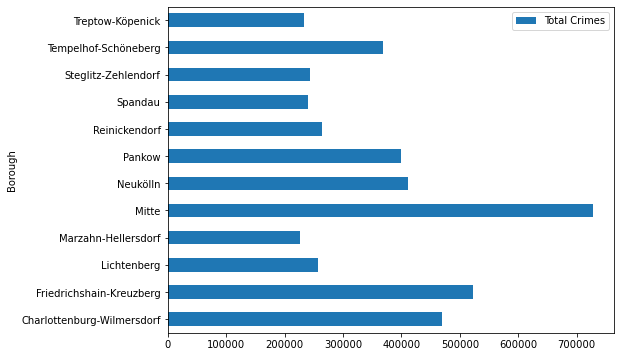

In [48]:
df_new.plot(kind="barh", x="Borough",y="Total Crimes",figsize=(8,6))

Now we can combine our cluster map and crime statistics results by showing them on a choropleth map

In [49]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/Jawuz/Coursera_Capstone-/main/berlin.json') as response:
    berlin_geo = json.load(response)

latitude=52.5170365 
longitude=13.3888599

berlin_map = folium.Map(location=[latitude, longitude], zoom_start=10)

In [50]:
berlin_map.choropleth(
    geo_data=berlin_geo,
    data=data_crime,
    columns=['Borough','Total Crimes'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Rates',
    highlight=True
)
markers_colors = []
for lat, lon, poi, cluster in zip(berlin_merged['Latitude'], berlin_merged['Longitude'], berlin_merged['Neighborhoods'], berlin_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=1).add_to(berlin_map)


C:\Users\User\anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [51]:
berlin_map

## Results and Discussion <a name="results"></a>

Berlin is the greatest city in Germany with its high energetic young population and very impressive history. Throughout the analysis our focus was on the most popular neighborhoods. Hence, we picked some boroughs like Charlottenburg-Wilmersdorf, Friedrichshain-Kreuzberg, Mitte, Neukölln and Pankow and explored all the restaurant in there. Some of the neighborhoods were eliminated also since they do not have any interesting places. 

After exploring the restaurants in our neighborhoods, we clustered them into 3 cluster groups by using an unsupervised learning(K-Means). This process helped us to group the neighborhoods according to frequency of specific restaurant types. 

At the end we combined the crime statistics of the city with our results and visualized them on the map in order to see which boroughs are safer than the others. Moreover, by visualizing the cluster groups on the same map made it easier to make a decision of an optimal location for an italian restaurant. 



## Conclusion <a name="conclusion"></a>

As we checked the final results on the map, we realize that Mitte has the highest crime rates. As we eliminate this borough, there are only two neighborhoods(Charlettenbur-Nord, Weissensee) remaining as a candidate for our italian restaurant.

Surely there are many other factors to make a final decision like closeness to parks, water, public transport, levels of noise, rents, real estate availability etc. However, our analysis could give us an idea regarding the current situation of Berlin restaurants and neighborhoods. It still has some potential to be developed further.   

